# Installation

In [15]:
# run this cell to install pycaret in Google Colab
# !pip install pycaret

SyntaxError: invalid syntax (<ipython-input-15-a1749441bae8>, line 3)

In [16]:
# If you are using Jupyter notebook, you can pip install pycaret using jupyter notebook or command line
!pip install pycaret

  Created wheel for pyod: filename=pyod-0.7.9-cp37-none-any.whl size=105573 sha256=471c01ab9fb22598382be80fab0a2a08bf00daaee8f25dbcd7ca0a1a9160ec23
  Stored in directory: C:\Users\ianno\AppData\Local\pip\Cache\wheels\f2\67\a4\ff47e0efaf4a93617047d2be52862dda80a848ff5c67bfb18d
  Created wheel for pandas-profiling: filename=pandas_profiling-2.3.0-py2.py3-none-any.whl size=145045 sha256=534374c74711abf188613f433dd6c2aaa74d17e8b852d2cf0137f6e375411e36
  Stored in directory: C:\Users\ianno\AppData\Local\pip\Cache\wheels\ce\c7\f1\dbfef4848ebb048cb1d4a22d1ed0c62d8ff2523747235e19fe
  Created wheel for umap-learn: filename=umap_learn-0.4.3-cp37-none-any.whl size=66582 sha256=0f26cc179a68c13210c34e61fce6669f365864f447f03217ec440daa67d7b03b
  Stored in directory: C:\Users\ianno\AppData\Local\pip\Cache\wheels\ca\44\8e\64bda5354fbf7ecdedd8704ca948f4139ce9cf34f6d9667c9b
  Created wheel for cufflinks: filename=cufflinks-0.17.0-cp37-none-any.whl size=68551 sha256=2a12e3fcd4c51d7d86595434f51ed9fc619d28

ERROR: phik 0.9.11 has requirement joblib>=0.14.1, but you'll have joblib 0.13.2 which is incompatible.
ERROR: umap-learn 0.4.3 has requirement numba!=0.47,>=0.46, but you'll have numba 0.45.1 which is incompatible.
ERROR: umap-learn 0.4.3 has requirement numpy>=1.17, but you'll have numpy 1.16.5 which is incompatible.
ERROR: spacy 2.2.4 has requirement tqdm<5.0.0,>=4.38.0, but you'll have tqdm 4.36.1 which is incompatible.


In [19]:
from pycaret.utils import version
version()

1.0.0


# 1. Importing Dataset

In [22]:
from pycaret.datasets import get_data
data = get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


# 2. Iteration 1: (without preprocessing)

In [23]:
from pycaret.regression import *
reg1 = setup(data, target = 'Price', session_id=786)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,786
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(6000, 8)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## 2.1. Compare Models

In [24]:
compare_models(blacklist = ['tr', 'catboost'])

#blacklisting means that these models will not be included in the model comparison (in this case omitted due to run time)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,758.154,2.34135e+06,1504.97,0.9771,0.0815,0.0607
1,Light Gradient Boosting Machine,761.549,2.89163e+06,1663.59,0.9717,0.0786,0.0575
2,Random Forest,774.567,2.8933e+06,1656.46,0.9715,0.0817,0.06
3,Gradient Boosting Regressor,917.863,3.27944e+06,1781.35,0.9686,0.1005,0.0766
4,Extreme Gradient Boosting,937.934,3.31544e+06,1794.93,0.9685,0.1041,0.0791
5,Decision Tree,1006.44,4.68776e+06,2119.35,0.9542,0.1087,0.0781
6,Ridge Regression,2506.94,1.50491e+07,3851.67,0.8571,0.6734,0.2947
7,Lasso Regression,2506.12,1.51239e+07,3862.55,0.8559,0.6749,0.2941
8,Lasso Least Angle Regression,2448.99,1.51673e+07,3865.12,0.8559,0.6613,0.2801
9,Bayesian Ridge,2509.28,1.51337e+07,3863.81,0.8559,0.6743,0.2947


## 2.2 Create Model

In [25]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2350.6876,1.117685e+07,3343.1796,0.8746,0.6214,0.3017
1,2412.2765,1.410911e+07,3756.2097,0.8562,0.6352,0.3068
2,2510.6250,1.450843e+07,3808.9932,0.8129,0.6781,0.3147
3,2569.3286,1.529323e+07,3910.6560,0.8516,0.6679,0.2915
4,2750.3762,2.206826e+07,4697.6866,0.8453,0.6442,0.3016
5,2546.0184,1.790410e+07,4231.3240,0.8591,0.6477,0.2768
6,2755.9629,1.919498e+07,4381.2073,0.8509,0.7866,0.3087
7,2304.7016,1.035101e+07,3217.2989,0.8809,0.6391,0.2777
8,2452.3263,1.502362e+07,3876.0321,0.8584,0.6161,0.2935
9,2429.3938,1.152695e+07,3395.1364,0.8684,0.6610,0.2742


# 2.3 Plot Model

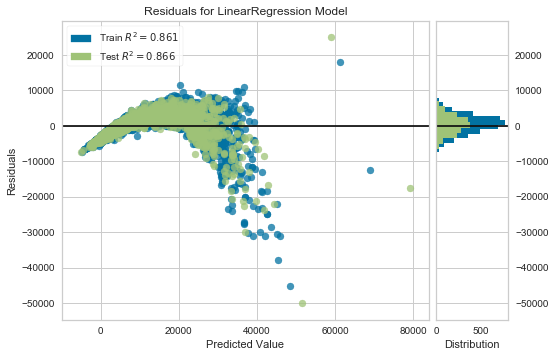

In [27]:
plot_model(lr)

#we see that the issue with linear regression is the variance being unconstant...heteroskedasticity)

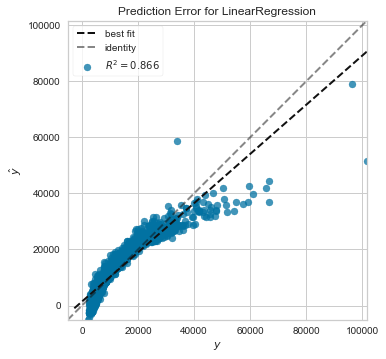

In [28]:
plot_model(lr, plot = 'error')

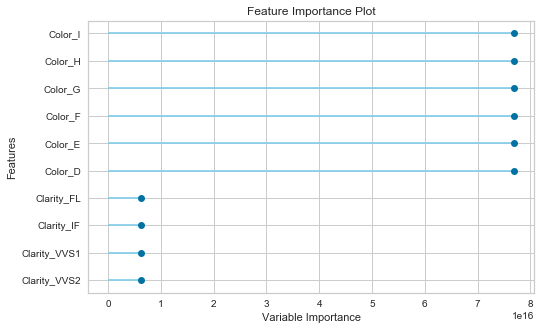

In [29]:
plot_model(lr, plot = 'feature')

#feature importance (super cool)

# 3. Iteration 2: (with preprocessing)

In [31]:
# profile = True
data = get_data('diamond', profile = True)

#profile = true will do some basic EDA (exploratory data analysis)

In [32]:
reg2 = setup(data, target = 'Price', session_id=786,
             transform_target = True, #must set transform target to true since we know we reqire some transformation to capture pattern observed
             bin_numeric_features=['Carat Weight'],
             remove_multicollinearity=True,
             feature_interaction=True)

#notice that original data had 28 columns...now with feature_interaction = TRUE we have 65 features

 
Setup Succesfully Completed!


,Description,Value
0,session_id,786
1,Transform Target,True
2,Transform Target Method,box-cox
3,Original Data,"(6000, 8)"
4,Missing Values,False
5,Numeric Features,1
6,Categorical Features,6
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


## 3.1 Create Model

In [38]:
lr2 = create_model('lr')

#observe that R2 has now increased to 96% (vs 86% previously)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,932.5408,2.816850e+06,1678.3473,0.9684,0.1147,0.0878
1,1077.8740,5.600288e+06,2366.4928,0.9429,0.1124,0.0875
2,1003.9972,3.624941e+06,1903.9279,0.9532,0.1192,0.0912
3,1084.5222,4.653111e+06,2157.1071,0.9548,0.1120,0.0844
4,1029.0569,4.683586e+06,2164.1593,0.9672,0.1157,0.0877
5,1219.3525,6.136353e+06,2477.1664,0.9517,0.1262,0.0949
6,943.7382,4.679073e+06,2163.1166,0.9637,0.1071,0.0795
7,1075.7032,3.336206e+06,1826.5284,0.9616,0.1350,0.1037
8,1057.7112,5.047685e+06,2246.7053,0.9524,0.1171,0.0881
9,1005.9749,2.959477e+06,1720.3129,0.9662,0.1167,0.0880


## 3.2. Plot Model

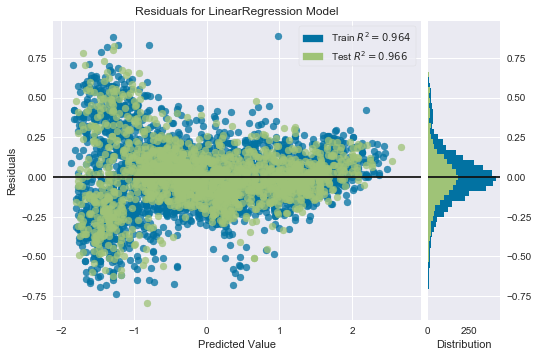

In [39]:
plot_model(lr2)

#notice that heteroskedasticity problem is solved

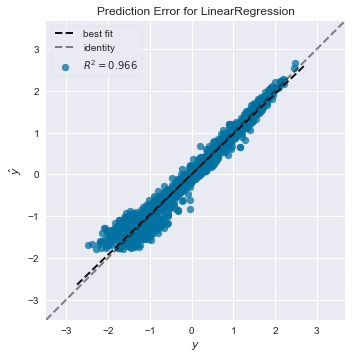

In [40]:
plot_model(lr2, plot = 'error')

#also improved

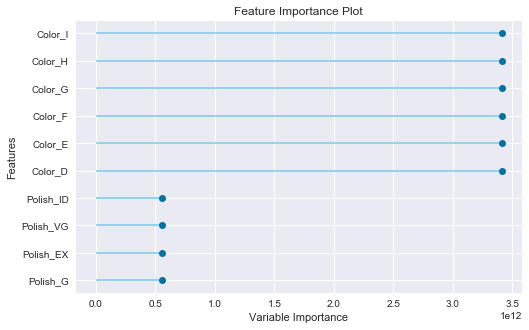

In [41]:
plot_model(lr2, plot = 'feature')

# 4. Finalize Model

In [43]:
holdout_pred = predict_model(lr2) #predict_model function will automatically predict on the test set (that's been set aside)

#we see that R2 of 96% holds for the test set as well

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,968.1558,3.864598e+06,1965.8582,0.9616,0.1106,0.0845


In [45]:
final_lr = finalize_model(lr2) #this will chunk in the 30% back into the trainset for future data to be added and tested on

In [46]:
print(final_lr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


# 5. Save Model

In [47]:
save_model(final_lr, 'lr_smith_demo')

Transformation Pipeline and Model Succesfully Saved


In [48]:
lr_loaded = load_model('lr_smith_demo')

Transformation Pipeline and Model Sucessfully Loaded


In [49]:
print(lr_loaded)

#this is not the model...this is the pipeline

[Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      ml_usecase='regression',
                                      numerical_features=[], target='Price',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                numeric_strategy='mean',
                                target_variable=None)),
                ('new_levels1',
                 New_Catagorical_Levels_i...
                ('feature_select', Empty()),
                ('fix_multi',
                 Fix_multicollinearity(correlation_with_target_preference=None,
                                       correlation_with_target_threshold=0.0,
                                       target_variable='Price',
                          

In [52]:
predictions = predict_model(lr_loaded, data=data)
predictions.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169,5657.1424
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470,3647.4226
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183,3409.9134
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370,3834.3035
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171,3546.2935


# 6. Deploy Model

In [53]:
deploy_model(final_lr, model_name = 'lr_smith_demo', platform = 'aws',
             authentication = {'bucket' : 'pycaret-test'})

NoCredentialsError: Unable to locate credentials

In [33]:
predictions2 = predict_model('lr_smith_demo', data=data)
predictions2.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169,5641.2017
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470,3402.7208
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183,3469.7911
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370,3825.9821
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171,3577.2618


# Learning Resources:

- PyCaret Regression Module : https://www.pycaret.org/regression
- Regression Tutorial (Level Beginner) : https://pycaret.org/reg101/
- Regression Tutorial (Level Intermediate) : https://pycaret.org/reg102/